In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [72]:
path= r"C:\Users\admin\Documents\machine-learning-code-orbit\team_members\From_Arooba\Global Economy Indicators.csv"
df= pd.read_csv(path)
df

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,1.952772e+08,3.701468e+08,3.766908e+08,1.277478e+08,1.731454e+09,8.391720e+07,2.263871e+08,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,2.762965e+08,3.875495e+08,3.944012e+08,1.337541e+08,1.812857e+09,8.786038e+07,2.370192e+08,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,2.903704e+08,3.522847e+08,3.585129e+08,1.215827e+08,1.647918e+09,7.986452e+07,2.154773e+08,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,2.629629e+08,3.640103e+08,3.704458e+08,1.256302e+08,1.702735e+09,8.252888e+07,2.226243e+08,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,3.056792e+08,4.407604e+08,4.485528e+08,1.521192e+08,2.061752e+09,9.991860e+07,2.695259e+08,2.106420e+09,2.061729e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,894,Zambia,2017,9.519501,9.519501,17298054,Kwacha,1448,1.041005e+09,567729313.0,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,894,Zambia,2018,10.458143,10.458143,17835893,Kwacha,1451,8.791160e+08,929063411.0,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,894,Zambia,2019,12.889418,12.889418,18380477,Kwacha,1246,6.668385e+08,817104395.0,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,894,Zambia,2020,18.344093,18.344093,18927715,Kwacha,928,5.391694e+08,439295787.0,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10


## Top 5 countries by average GDP.

In [73]:
top5_gdp = df.groupby(' Country ')[' Gross Domestic Product (GDP) '].mean().sort_values(ascending=False).head(5)
print("Top 5 countries by average GDP:")
top5_gdp

Top 5 countries by average GDP:


 Country 
United States      9.321346e+12
Japan              3.417731e+12
China              3.372873e+12
Germany            2.095904e+12
United Kingdom     1.515096e+12
Name:  Gross Domestic Product (GDP) , dtype: float64

## Countries with the Household consumption expenditure in the most recent year.

In [74]:
most_recent_year = df[' Year '].max()
recent_consumption = df[df[' Year '] == most_recent_year][[' Country ', ' Household consumption expenditure (including Non-profit institutions serving households) ']]
recent_consumption = recent_consumption.rename(columns={
    ' Household consumption expenditure (including Non-profit institutions serving households) ': ' Household Consumption Expenditure'})
recent_consumption = recent_consumption.sort_values(by=' Household Consumption Expenditure', ascending=False)
recent_consumption

,Country,Household Consumption Expenditure
10144,United States,1.590000e+13
1999,China,6.800000e+12
4680,Japan,2.660000e+12
3484,Germany,2.100000e+12
4212,India,1.910000e+12
...,...,...
6464,Nauru,1.299534e+08
2259,Cook Islands,1.068476e+08
6204,Montserrat,5.465786e+07
9767,Tuvalu,3.655580e+07


## Group by Country and calculate:
# Mean GDP per capita.

In [75]:
gdp_per_capita = df.groupby(' Country ')[[" Gross Domestic Product (GDP) "," Per capita GNI "]].mean()
gdp_per_capita

,Gross Domestic Product (GDP),Per capita GNI
Country,,
Afghanistan,7.094304e+09,313.403846
Albania,5.996965e+09,2052.807692
Algeria,8.267588e+10,2530.923077
Andorra,1.719792e+09,26166.826923
Angola,3.650808e+10,1527.615385
...,...,...
Yemen Democratic (Former),3.406513e+08,155.809524
Yugoslavia (Former),5.617382e+10,2561.857143
Zambia,8.983579e+09,696.692308


## Max import of goods values

In [76]:
max_imports = df.groupby(' Country ')[' Imports of goods and services '].max().sort_values(ascending=False)
max_imports

 Country 
United States               3.400000e+12
China                       3.060000e+12
Germany                     1.780000e+12
Japan                       1.010000e+12
United Kingdom              9.430000e+11
                                ...     
Nauru                       1.378354e+08
Montserrat                  6.614815e+07
Tuvalu                      6.190085e+07
Czechoslovakia (Former)              NaN
USSR (Former)                        NaN
Name:  Imports of goods and services , Length: 220, dtype: float64

## Total exports over all years.

In [77]:
total_exports_by_country = df.groupby([' Country ', ' Year '])[' Exports of goods and services '].sum()
total_exports_by_country

 Country       Year 
Afghanistan   1970      1.656187e+08
              1971      1.935803e+08
              1972      2.276544e+08
              1973      2.269136e+08
              1974      2.849384e+08
                            ...     
Zimbabwe      2017      5.434790e+09
              2018      6.186541e+09
              2019      6.137453e+09
              2020      5.614855e+09
              2021      6.128771e+09
Name:  Exports of goods and services , Length: 10512, dtype: float64

## Plot all above

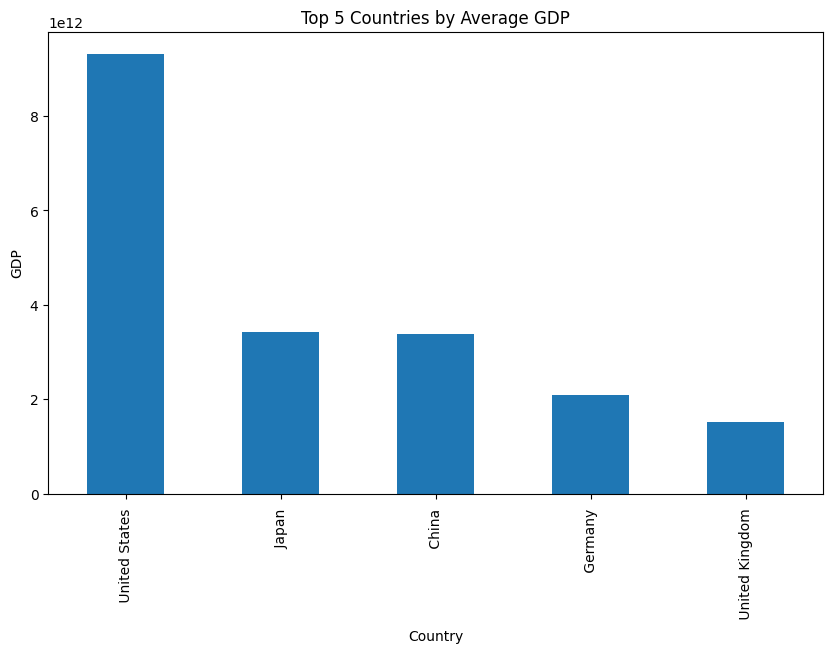

In [78]:
# Plotting Top 5 countries by average GDP.
top5_gdp.plot(kind='bar', title='Top 5 Countries by Average GDP', ylabel='GDP', xlabel='Country', figsize=(10, 6))
plt.show()


<Figure size 1200x1000 with 0 Axes>

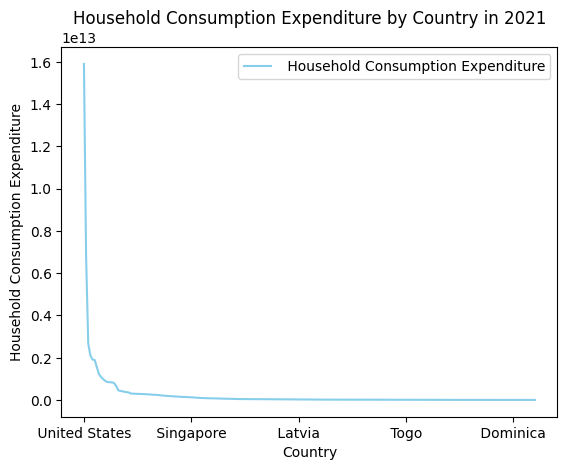

In [79]:
# Plotting Household Consumption Expenditure for the most recent year
plt.figure(figsize=(12, 10))
recent_consumption.plot(kind='line', x=' Country ', y=' Household Consumption Expenditure', color='skyblue')
plt.title('Household Consumption Expenditure by Country in ' + str(most_recent_year))
plt.xlabel('Country')
plt.ylabel('Household Consumption Expenditure')
plt.show()

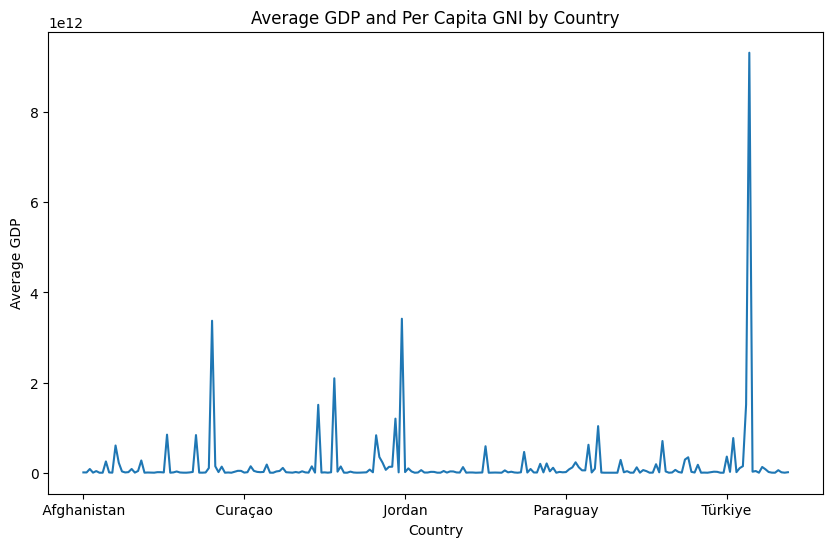

In [80]:
# Plotting GDP per capita
plt.figure(figsize=(10, 6))
gdp_per_capita[' Gross Domestic Product (GDP) '].plot()
plt.title('Average GDP and Per Capita GNI by Country')
plt.xlabel('Country')
plt.ylabel('Average GDP')
plt.show()

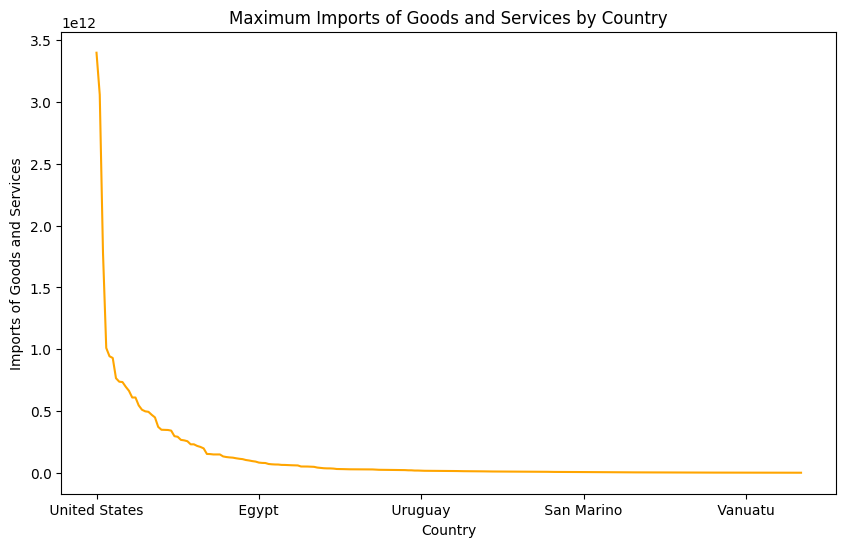

In [81]:
# Plotting Max Imports of Goods and Services
plt.figure(figsize=(10, 6))
max_imports = df.groupby(' Country ')[' Imports of goods and services '].max().sort_values(ascending=False)
max_imports.plot(kind='line', color='orange')
plt.title('Maximum Imports of Goods and Services by Country')
plt.xlabel('Country')
plt.ylabel('Imports of Goods and Services')
plt.show()

<Figure size 1000x600 with 0 Axes>

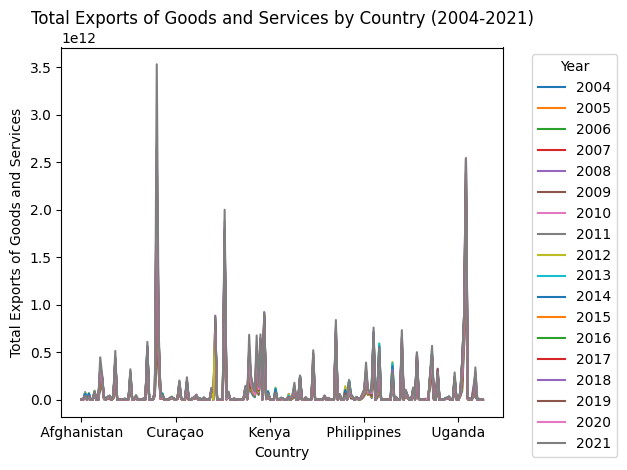

In [82]:
# Plotting total exports over all years.
exports_filtered = total_exports_by_country.reset_index()
exports_filtered = exports_filtered[(exports_filtered[' Year '] >= 2004) & (exports_filtered[' Year '] <= 2021)]
exports_filtered = exports_filtered.set_index([' Country ', ' Year '])[' Exports of goods and services ']

plt.figure(figsize=(10, 6))
exports_filtered.unstack().plot()
plt.xlabel('Country')
plt.ylabel('Total Exports of Goods and Services')
plt.title('Total Exports of Goods and Services by Country (2004-2021)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
